# PyCalcolAr
### Inizializzazione

In [1023]:
# Importare le librerie utili per la creazione del codice
import pandas as pd
import numpy as np
import math 
from IPython.display import display

# Variabili utilizzate nel calcolo, da modificare manualmente dall'utente  
delay = 246

### Importazione files
### > file triplo36 (file di calibrazione dell'aria)

In [1024]:
# definire il percorso del file
file_path = "../test_data/Triplo36.txt"

# definire la lista con gli indici delle colonne 
columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0', 'Run', 'Path']

# trasformare le colonne in dati numerici (ad eccezione delle colonne 'Run' e 'Path')
columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0']

# importare il file utilizzando caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne relative all'errore
airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
for i in columns_numeric:
    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
print("Air pipette initial imported data:")

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe airpipette_data
airpipette_data = pd.concat([run_name, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
airpipette_data.drop('Run',axis=1, inplace=True)

# Conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)

airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
airpipette_data.loc[:,'36F'] = airpipette_data.loc[:,'36F'].values / 62415000
airpipette_data.loc[:,'err 36F'] = airpipette_data.loc[:,'err 36F'].values / 62415000


display(airpipette_data)

Air pipette initial imported data:


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
0,Sample Name,2015-10-06 10:33:00,0.73900,0.00400,0.000799,9.292638e-07,0.001154,0.000004,0.004150,0.000003,0.002307,0.000021,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2015-10-06 10:52:00,1.22000,0.00041,0.000796,9.613074e-07,0.001211,0.000003,0.004134,0.000003,0.004021,0.000014,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-10-06 11:23:00,1.22000,0.00051,0.000798,8.171113e-07,0.001230,0.000003,0.004150,0.000002,0.004021,0.000015,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-10-08 10:13:00,0.75800,0.00400,0.000796,8.811984e-07,0.001067,0.000004,0.004134,0.000002,0.002307,0.000018,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-10-08 10:27:00,1.09000,0.00036,0.000694,1.009373e-06,0.000974,0.000003,0.003589,0.000002,0.003525,0.000022,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Sample Name,2020-06-23 11:02:00,1.65538,0.00053,0.000886,1.265721e-06,0.004927,0.000004,0.004775,0.000004,0.005568,0.000018,Raw data stored in - C:\Nu Noble\Results\Data...
830,Sample Name,2020-06-24 09:25:00,1.65331,0.00043,0.000884,1.441961e-06,0.004896,0.000004,0.004765,0.000005,0.005594,0.000021,Raw data stored in - C:\Nu Noble\Results\Data...
831,Sample Name,2020-06-24 09:50:00,1.65039,0.00049,0.000891,1.313787e-06,0.004914,0.000003,0.004798,0.000004,0.005575,0.000021,Raw data stored in - C:\Nu Noble\Results\Data...
832,Sample Name,2020-06-24 10:08:00,1.64847,0.00056,0.000891,1.009373e-06,0.004916,0.000004,0.004792,0.000004,0.005553,0.000022,Raw data stored in - C:\Nu Noble\Results\Data...


### > file run4 e run22 (file di misura)

In [1025]:
# definire la lista con gli indici delle colonne 
column_names_run4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']
column_names_run22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']

# definire il percorso dei file
file_path_4 = "../test_data/Run4.txt"
file_path_22 = "../test_data/Run22.txt"

# importare i file run
df_data_4 = pd.read_csv(file_path_4, header = None, index_col= False, names = column_names_run4, sep = '\t|,', engine = 'python')
df_data_22 = pd.read_csv(file_path_22, header = None, index_col= False, names = column_names_run22, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne
df_data_4 = df_data_4.replace(["{", "}"], ["", ""], regex=True)
df_data_22 = df_data_22.replace(["{", "}"], ["", ""], regex=True)

# definire nome delle colonne che contengono dati numerici
colnames_numeric_4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']   
colnames_numeric_22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']

# convertire tutte le colonne del dataframe df_data_4 a numeric (float64)
for i in colnames_numeric_4:
    df_data_4[i] = pd.to_numeric(df_data_4[i])

# convertire tutte le colonne del dataframe df_data_22 a numeric (float64)
for i in colnames_numeric_22:
    df_data_22[i] = pd.to_numeric(df_data_22[i])

df_data = pd.concat([df_data_4, df_data_22], axis=0)

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = df_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe df_data
df_data = pd.concat([run_name, dataora, df_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
df_data.drop('Run',axis=1, inplace=True)

display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,...,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,fishcanyon bt stp1,2015-04-08 16:03:00,0.847000,0.000370,0.000493,3.700000e-07,0.002460,3.900000e-06,0.000047,0.000015,...,6.600000e-09,0.396,0.064,1.060000,0.0018,345.000,0.57,325.000,0.21,Raw data stored in - C:\Nu Noble\Results\Data...
1,fishcanyon bt stp2,2015-04-08 16:33:00,2.300000,0.000870,0.001540,8.500000e-07,0.006340,9.200000e-06,0.000107,0.000013,...,1.000000e-08,2.670,0.018,1.030000,0.0015,363.000,0.55,354.000,0.19,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-04-08 17:28:00,1.080000,0.000350,0.000750,5.000000e-07,0.002850,5.400000e-06,0.000037,0.000012,...,8.200000e-09,4.340,0.029,1.070000,0.0021,378.000,0.72,354.000,0.20,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-04-09 11:39:00,0.089300,0.000040,0.000059,1.300000e-07,0.000215,2.700000e-07,0.000009,0.000012,...,4.400000e-08,2.160,0.260,1.210000,0.0020,416.000,0.55,345.000,0.41,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-04-09 12:11:00,0.578000,0.000270,0.000329,3.000000e-07,0.001530,2.400000e-06,0.000050,0.000011,...,6.400000e-09,48700.000,48000.000,1.110000,0.0018,378.000,0.61,340.000,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,BAL-T12 LG ST2,2020-06-23 15:31:00,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,...,NaN,NaN,NaN,0.997925,0.0012,482.535,0.42,483.538,0.46,Raw data stored in - C:\Nu Noble\Results\Data...
1334,BAL-T12 LG ST3,2020-06-23 15:57:00,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,...,NaN,NaN,NaN,1.003020,0.0022,838.663,1.30,836.139,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
1335,BAL-T12 LG ST6,2020-06-23 17:08:00,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,...,NaN,NaN,NaN,1.008230,0.0013,567.014,0.58,562.386,0.54,Raw data stored in - C:\Nu Noble\Results\Data...
1336,BAL-T12 ST7,2020-06-23 17:26:00,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,...,NaN,NaN,NaN,1.015770,0.0016,1024.300,1.20,1008.400,1.20,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare dati misurati per data e ora per selezionare un solo campione
#### Verificare correttezza della selezione nel dataframe visualizzato!!

In [1026]:
# filtrare il dataframe per data 
filter_data_min = pd.Timestamp(year=2020, month=6, day=24, hour=8)
filter_data_max = pd.Timestamp(year=2020, month=6, day=24, hour=22)

df_data = df_data[(df_data['Date_Time'] > filter_data_min) & (df_data['Date_Time'] < filter_data_max)]
df_data.reset_index(drop=True, inplace=True)
df_data.sort_values('Date_Time', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

print("\n   > df_data:")
display(df_data)

# opzione con selezione manuale da lista dropdown
# filtrare il dataframe per data, prendendo una sola riga 
# import ipywidgets as widgets
# usando to_list()[-1] si seleziona l'ultimo elemento della lista, cioè la calbrazione più recente, come default
# data_w = widgets.Dropdown(options=airpipette_data['Date_Time'].to_list(),
#                  value=airpipette_data['Date_Time'].to_list()[-1],
#                  description='Date_Time of calibration:',
#                  disabled=False)
# data_w = data_w.value

# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
sample_min = min(df_data['Date_Time'].to_list())
older_calibration_df = airpipette_data[airpipette_data['Date_Time'] < sample_min]
data_w = max(older_calibration_df['Date_Time'].to_list())

airpipette_data_filtered = airpipette_data[airpipette_data['Date_Time'] == data_w]
calibration_data = airpipette_data_filtered 

print("\n\n   > calibration_data:")
display(calibration_data)


   > df_data:


,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,...,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,TOM SM ST1,2020-06-24 11:19:00,0.143381,0.000050,0.000129,2.500000e-07,0.000410,4.800000e-07,0.000205,0.000018,...,5.600000e-08,1.45045,0.1300,0.960810,0.00160,349.708,0.43,363.972,0.45,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2020-06-24 11:47:00,0.646386,0.000210,0.000391,4.200000e-07,0.001882,1.300000e-06,0.000501,0.000016,...,6.800000e-08,1.28278,0.0660,0.970343,0.00088,343.386,0.26,353.881,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
2,TOM SM ST3,2020-06-24 12:08:00,0.113456,0.000036,0.000180,2.900000e-07,0.000300,4.200000e-07,0.000225,0.000017,...,6.100000e-08,1.21714,0.0230,0.971918,0.00180,378.730,0.55,389.672,0.50,Raw data stored in - C:\Nu Noble\Results\Data...
3,TOM SM ST4,2020-06-24 12:29:00,0.140526,0.000047,0.000288,4.000000e-07,0.000351,4.000000e-07,0.000363,0.000017,...,6.500000e-08,1.21116,0.0120,0.982168,0.00170,400.302,0.47,407.569,0.53,Raw data stored in - C:\Nu Noble\Results\Data...
4,TOM SM ST5,2020-06-24 12:57:00,0.341902,0.000110,0.000471,4.300000e-07,0.000922,7.800000e-07,0.000567,0.000017,...,5.600000e-08,1.18115,0.0089,0.979210,0.00110,370.815,0.33,378.688,0.31,Raw data stored in - C:\Nu Noble\Results\Data...




   > calibration_data:


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
832,Sample Name,2020-06-24 10:08:00,1.64847,0.00056,0.000891,0.000001,0.004916,0.000004,0.004792,0.000004,0.005553,0.000022,Raw data stored in - C:\Nu Noble\Results\Data...


### Operazioni derivate dal file di calibrazione triplo36 (da foglio Excel sample_data)
#### per calcolare 1sig_rel (errore relativo) = err / 36Ar (IC0 o IC1 in base al collettore usato)

In [1027]:
value_err36IC0 = float(calibration_data['err 36IC0'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
sig_rel_36IC0 = float(value_err36IC0 / value_36IC0)

print ('1sig_rel_36IC0', sig_rel_36IC0)

1sig_rel_36IC0 0.0007690610099442931


In [1028]:
value_err36IC1 = float(calibration_data['err 36IC1'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
sig_rel_36IC1 = float(value_err36IC1 / value_36IC1)

print ('1sig_rel_36IC1', sig_rel_36IC1)

1sig_rel_36IC1 0.0008473250599645426


In [1029]:
value_err36F = float(calibration_data['err 36F'].values)
value_36F = float(calibration_data['36F'].values)
sig_rel_36F = float(value_err36F / value_36F)

print ('1sig_rel_36F', sig_rel_36F)

1sig_rel_36F 0.00403926162297532


In [1030]:
# calcolo gain F/IC0

value_36F = float(calibration_data['36F'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
gain_F_IC0 = float(value_36F / value_36IC0)

print ('gain F/IC0', gain_F_IC0)

gain F/IC0 1.1589348170637919


In [1031]:
# calcolo l'errore assoluto del gain F/IC0

sig_abs_F_ICO = gain_F_IC0 * (pow(sig_rel_36IC0, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/ICO', sig_abs_F_ICO)

sig_abs_F/ICO 0.004765334964903748


In [1032]:
# calcolo gain F/IC1 

value_36F = float(calibration_data['36F'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
gain_F_IC1 = float(value_36F / value_36IC1)

print ('gain F/IC1: ', gain_F_IC1)

gain F/IC1:  1.129542965898425


In [1033]:
# calcolo l'errore assoluto del gain F/IC1

sig_abs_F_IC1 = gain_F_IC1 * (pow(sig_rel_36IC1, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/IC1', sig_abs_F_IC1)

sig_abs_F/IC1 0.004661824327765827


In [1034]:
# calcolo 36IC0 correzione gain

corr_gain_36IC0 = value_36IC0 * gain_F_IC0

print ('corr_gain_36IC0: ', corr_gain_36IC0) 

corr_gain_36IC0:  0.005553120243531203


In [1035]:
# calcolo 40/36 correzione

value_40F = float(calibration_data['40F'].values)

corr_40_36 = (value_40F) / corr_gain_36IC0

print ('corr_40_36: ', corr_40_36)

corr_40_36:  296.854728099989


In [1036]:
# calcolo l'errore assoluto del 40/36 correzione

sig_abs_40_36 = corr_40_36 * (pow(sig_rel_36F, 2) + pow(calibration_data['err 40F'].values / calibration_data['40F'].values, 2))**(1/2)

print ('sig_abs_40/36', sig_abs_40_36)

sig_abs_40/36 [1.20330703]


In [1037]:
# calcolo source frax 

source_frax = float(corr_40_36 / 298.56)

print ('source_frax: ', source_frax)

source_frax:  0.9942883443863512


In [1038]:
# calcolo l'errore assoluto di source frax

sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

print ('sig_abs_source_frax', sig_abs_source_frax)

sig_abs_source_frax [0.00403037]


#### Definire tutti i parametri delle tabelle (A) e (B) del file Excel CalcolAr
### Tabella: BACKGROUND SPECTROMETER
#### (da modificare manualmente dall'utente, valori misurati 4/5 di volte l'anno)

In [1063]:
update_data = pd.Timestamp(year=2021, month=1, day=23)

background_spectrometer_dict = {'Update date': [update_data, np.nan],
                                'Background 40Ar': [0.0020, 0.1],
                                'Background 39Ar': [0.0030, 0.1],
                                'Background 38Ar': [0.0010, 0.1],
                                'Background 37Ar': [0.0040655291, 0.2],
                                'Background 36Ar': [0.0005, 0.1]}

background_spectrometer_df = pd.DataFrame.from_dict(background_spectrometer_dict, orient='index')
background_spectrometer_df.columns = ['value', 'relative error']

display(background_spectrometer_df)

,value,relative error
Update date,2021-01-23 00:00:00,NaN
Background 40Ar,0.002,0.1
Background 39Ar,0.003,0.1
Background 38Ar,0.001,0.1
Background 37Ar,0.00406553,0.2
Background 36Ar,0.0005,0.1


### Tabella: IRRADIATIONS CONSTANTS 
#### (valori costanti, non sono da modificare)

In [1064]:
irradiations_constants_dict = {'Atmospheric Ratio': [298.56, np.nan],
                                '(36Ar/37Ar) Ca': [0.000255, 0.015],
                                '(38Ar/37Ar) Ca': [0.00027, 0.015],
                                '(39Ar/37Ar) Ca': [0.00067, 0.015],
                                'Lambda Ar37 [1/d]': [0.019748, np.nan],
                                'Lambda Ar40 [1/Ma]': [0.0005543, np.nan],
                                'Interference 40K': [0.033, 0.01],
                                'Coefficient 39Ar for J': [143, np.nan],
                                'Coefficient Ca/K': [1.94, np.nan],
                                'Coefficient Cl/K': [0.178, np.nan]}

irradiations_constants_df = pd.DataFrame.from_dict(irradiations_constants_dict, orient='index')
irradiations_constants_df.columns = ['value', 'relative error']

display(irradiations_constants_df)

,value,relative error
Atmospheric Ratio,298.560000,NaN
(36Ar/37Ar) Ca,0.000255,0.015
(38Ar/37Ar) Ca,0.000270,0.015
(39Ar/37Ar) Ca,0.000670,0.015
Lambda Ar37 [1/d],0.019748,NaN
Lambda Ar40 [1/Ma],0.000554,NaN
Interference 40K,0.033000,0.010
Coefficient 39Ar for J,143.000000,NaN
Coefficient Ca/K,1.940000,NaN
Coefficient Cl/K,0.178000,NaN


### Tabella: IRRADIATIONS
#### (da modificare manualmente dall'utente)

### Operazioni foglio Excel CalcolAr = file PyCalcolAr
#### Le operazione verranno aggiunte in un unico dataframe di risultati simile a quelle del file Excel CalcolAr

In [1065]:
# sample_weight, da modificare manuelmente dall'utente (cambia per ogni campione) 
sample_weight = 0.00034

# J_factor e J_factor_errors, da modificare manuelmente dall'utente (cambia per ogni campione) 
J_factor = 0.0011422
J_factor_errors = 0.0002

# sensitivity, da modificare manuelmente dall'utente (valore misurato un paio di volte l'anno) 
sensitivity = 0.0000000000337 

# i seguenti calcoli vengono svolti dal codice
gain_F_IC0 = gain_F_IC0 # già calcolato precedentemente  

gain_rel_uncertainty_errors = calibration_data['err 40F'].values / calibration_data['err 36F'].values
gain_rel_uncertainty = gain_rel_uncertainty_errors / gain_F_IC0

measured_40Ar_36Ar_pipettes = calibration_data['40F'].values / calibration_data['36IC1'].values

gain_corrected_40Ar_36Ar_pipettes = measured_40Ar_36Ar_pipettes / gain_F_IC0
gain_corrected_40Ar_36Ar_pipettes_errors = gain_corrected_40Ar_36Ar_pipettes / irradiations_constants_df.loc['Atmospheric Ratio', 'value']

pipette_rel_uncertainty = sig_abs_source_frax  
total_fractionation_uncertainty = sig_abs_source_frax 


irradiations_dict = {'Sample weight [g]': [sample_weight, np.nan],
                     'J factor': [J_factor, J_factor_errors],
                     'Sensitivity (mL/mV)': [sensitivity, np.nan],
                     'Gain F/IC0': [gain_F_IC0, np.nan],
                     'Gain rel uncertainty': [gain_rel_uncertainty[0], gain_rel_uncertainty_errors[0]],
                     'Measured 40Ar/36Ar pipettes': [measured_40Ar_36Ar_pipettes[0], np.nan],
                     'Gain corrected 40Ar/36Ar pipettes': [gain_corrected_40Ar_36Ar_pipettes[0], gain_corrected_40Ar_36Ar_pipettes_errors[0]], 
                     'Pipette rel uncertainty': [pipette_rel_uncertainty[0], np.nan],
                     'Total fractionation uncertainty': [total_fractionation_uncertainty[0], np.nan]} 

irradiations_df = pd.DataFrame.from_dict(irradiations_dict, orient='index')
irradiations_df.columns = ['value', 'relative error']

display(irradiations_df)

,value,relative error
Sample weight [g],3.400000e-04,NaN
J factor,1.142200e-03,0.000200
Sensitivity (mL/mV),3.370000e-11,NaN
Gain F/IC0,1.158935e+00,NaN
Gain rel uncertainty,2.154220e+01,24.966000
Measured 40Ar/36Ar pipettes,3.353102e+02,NaN
Gain corrected 40Ar/36Ar pipettes,2.893262e+02,0.969072
Pipette rel uncertainty,4.030369e-03,NaN
Total fractionation uncertainty,4.030369e-03,NaN


In [1066]:
# creare il dataframe input_data 
input_data_df = pd.DataFrame() 

# colonna Time costante 
input_data_df.loc[:, 'Time'] = pd.Series(1 for k in range(0, len(df_data.index)))

# 6° cella del codice (da modificare manualmente dall'utente)
input_data_df.loc[:, 'Delay'] = pd.Series(delay for k in range(0, len(df_data.index)))

display(input_data_df)

,Time,Delay
0,1,246
1,1,246
2,1,246
3,1,246
4,1,246


### Input = online Regression

In [1067]:
input_data_df.loc[:, '40Ar'] = df_data.loc[:, '40Ar F'].values * 1000
input_data_df.loc[:, 'err40Ar'] = df_data.loc[:, 'err40Ar F'].values * 1000

input_data_df.loc[:, '39Ar'] = df_data.loc[:, '39Ar F'].values * 1000
input_data_df.loc[:, 'err39Ar'] = df_data.loc[:, 'err39Ar F'].values * 1000

input_data_df.loc[:, '38Ar'] = df_data.loc[:, '38Ar IC0'].values * gain_F_IC0 * 1000
input_data_df.loc[:, 'err38Ar'] = df_data.loc[:, 'err38Ar IC0'].values * gain_F_IC0 * 1000

input_data_df.loc[:, '37Ar'] = df_data.loc[:, '37Ar IC1'].values * gain_F_IC1 * 1000
input_data_df.loc[:, 'err37Ar'] = df_data.loc[:, 'err37Ar IC1'].values * gain_F_IC1 * 1000

input_data_df.loc[:, '36Ar'] = df_data.loc[:, '36Ar IC1'].values * gain_F_IC1 * 1000
input_data_df.loc[:, 'err36Ar'] = df_data.loc[:, 'err36Ar IC1'].values * gain_F_IC1 * 1000

display(input_data_df)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,0.463116,0.000542
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,2.126240,0.001468
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,0.338377,0.000474
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,0.396526,0.000452
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,1.041470,0.000881


### Measured values corrected for mass spectrometer background

In [1068]:
results_data = input_data_df

results_data.loc[:,'40Ar BC'] = results_data.loc[:, '40Ar'].values - (results_data.loc[:, '39Ar'].values * \
                                irradiations_constants_df.loc['Interference 40K', 'value']) - \
                                background_spectrometer_df.loc['Background 40Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,0.463116,0.000542,143.372564
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,2.126240,0.001468,646.374006
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,0.338377,0.000474,113.423562
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,0.396526,0.000452,140.467901
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,1.041470,0.000881,341.825630


In [1069]:
results_data.loc[:,'1sigma_abs40'] = (pow(results_data.loc[:, 'err40Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 40Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 40Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,0.463116,0.000542,143.372564,0.050000
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,2.126240,0.001468,646.374006,0.210000
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,0.338377,0.000474,113.423562,0.036001
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,0.396526,0.000452,140.467901,0.047000
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,1.041470,0.000881,341.825630,0.110000


In [1070]:
results_data.loc[:,'1sigma_rel40'] = results_data.loc[:,'1sigma_abs40'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,0.463116,0.000542,143.372564,0.050000,0.000349
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,2.126240,0.001468,646.374006,0.210000,0.000325
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,0.338377,0.000474,113.423562,0.036001,0.000317
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,0.396526,0.000452,140.467901,0.047000,0.000335
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,1.041470,0.000881,341.825630,0.110000,0.000322


In [1071]:
results_data.loc[:,'39Ar BC'] = results_data.loc[:, '39Ar'].values - background_spectrometer_df.loc['Background 39Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,0.463116,0.000542,143.372564,0.050000,0.000349,0.192045
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,2.126240,0.001468,646.374006,0.210000,0.000325,0.299842
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,0.338377,0.000474,113.423562,0.036001,0.000317,0.919371
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630


In [1072]:
results_data.loc[:,'1sigma_abs39'] = (pow(results_data.loc[:, 'err39Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 39Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 39Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,0.463116,0.000542,143.372564,0.050000,0.000349,0.192045,0.018002
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,2.126240,0.001468,646.374006,0.210000,0.000325,0.299842,0.016003
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,0.338377,0.000474,113.423562,0.036001,0.000317,0.919371,0.018002
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003


In [1073]:
results_data.loc[:,'1sigma_rel39'] = results_data.loc[:,'1sigma_abs39'].values / results_data.loc[:,'39Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,0.463116,0.000542,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,2.126240,0.001468,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,0.338377,0.000474,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555


In [1074]:
results_data.loc[:,'38Ar BC'] = results_data.loc[:, '38Ar'].values - background_spectrometer_df.loc['Background 38Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,0.463116,0.000542,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741,0.148163
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,2.126240,0.001468,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371,0.451817
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,0.338377,0.000474,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581,0.207054
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465


In [1075]:
results_data.loc[:,'1sigma_abs38'] = (pow(results_data.loc[:, 'err38Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 38Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 38Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,0.463116,0.000542,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741,0.148163,0.000307
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,2.126240,0.001468,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371,0.451817,0.000497
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,0.338377,0.000474,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581,0.207054,0.000351
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,0.396526,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,1.041470,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508


In [1076]:
results_data.loc[:,'1sigma_rel38'] = results_data.loc[:,'1sigma_abs38'].values / results_data.loc[:,'38Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.000542,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741,0.148163,0.000307,0.002069
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.001468,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371,0.451817,0.000497,0.001100
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.000474,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581,0.207054,0.000351,0.001694
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.000452,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000881,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934


In [1077]:
results_data.loc[:,'37Ar BC'] = results_data.loc[:, '37Ar'].values - background_spectrometer_df.loc['Background 37Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741,0.148163,0.000307,0.002069,0.002680
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371,0.451817,0.000497,0.001100,0.003797
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581,0.207054,0.000351,0.001694,0.002898
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003120
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934,0.003529


In [1078]:
results_data.loc[:,'1sigma_abs37'] = (pow(results_data.loc[:, 'err37Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 37Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 37Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.050000,0.000349,0.192045,0.018002,0.093741,0.148163,0.000307,0.002069,0.002680,0.000816
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.210000,0.000325,0.299842,0.016003,0.053371,0.451817,0.000497,0.001100,0.003797,0.000817
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.036001,0.000317,0.919371,0.018002,0.019581,0.207054,0.000351,0.001694,0.002898,0.000816
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.047000,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003120,0.000816
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.110000,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934,0.003529,0.000816


In [1079]:
results_data.loc[:,'1sigma_rel37'] = results_data.loc[:,'1sigma_abs37'].values / results_data.loc[:,'37Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.000349,0.192045,0.018002,0.093741,0.148163,0.000307,0.002069,0.002680,0.000816,0.304362
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.000325,0.299842,0.016003,0.053371,0.451817,0.000497,0.001100,0.003797,0.000817,0.215079
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.000317,0.919371,0.018002,0.019581,0.207054,0.000351,0.001694,0.002898,0.000816,0.281624
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.000335,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003120,0.000816,0.261680
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000322,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934,0.003529,0.000816,0.231112


In [1080]:
results_data.loc[:,'36Ar BC'] = results_data.loc[:, '36Ar'].values - background_spectrometer_df.loc['Background 36Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.192045,0.018002,0.093741,0.148163,0.000307,0.002069,0.002680,0.000816,0.304362,0.462616
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.299842,0.016003,0.053371,0.451817,0.000497,0.001100,0.003797,0.000817,0.215079,2.125740
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.919371,0.018002,0.019581,0.207054,0.000351,0.001694,0.002898,0.000816,0.281624,0.337877
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,1.696970,0.017003,0.010019,0.333251,0.000474,0.001423,0.003120,0.000816,0.261680,0.396026
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,2.250630,0.017003,0.007555,0.544465,0.000508,0.000934,0.003529,0.000816,0.231112,1.040970


In [1081]:
results_data.loc[:,'1sigma_abs36'] = (pow(results_data.loc[:, 'err36Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 36Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 36Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.018002,0.093741,0.148163,0.000307,0.002069,0.002680,0.000816,0.304362,0.462616,0.000544
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.016003,0.053371,0.451817,0.000497,0.001100,0.003797,0.000817,0.215079,2.125740,0.001469
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.018002,0.019581,0.207054,0.000351,0.001694,0.002898,0.000816,0.281624,0.337877,0.000477
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.017003,0.010019,0.333251,0.000474,0.001423,0.003120,0.000816,0.261680,0.396026,0.000455
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.017003,0.007555,0.544465,0.000508,0.000934,0.003529,0.000816,0.231112,1.040970,0.000882


In [1082]:
results_data.loc[:,'1sigma_rel36'] = results_data.loc[:,'1sigma_abs36'].values / results_data.loc[:,'36Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.093741,0.148163,0.000307,0.002069,0.002680,0.000816,0.304362,0.462616,0.000544,0.001177
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.053371,0.451817,0.000497,0.001100,0.003797,0.000817,0.215079,2.125740,0.001469,0.000691
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.019581,0.207054,0.000351,0.001694,0.002898,0.000816,0.281624,0.337877,0.000477,0.001412
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.010019,0.333251,0.000474,0.001423,0.003120,0.000816,0.261680,0.396026,0.000455,0.001148
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.007555,0.544465,0.000508,0.000934,0.003529,0.000816,0.231112,1.040970,0.000882,0.000848


### 37Ar decay

In [1083]:
#results_data.loc[:,'Decay Factor'] = (irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                      results_data.loc[:, 'Time'].values * \
#                                        math.exp(irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                       results_data.loc[:, 'Delay'].values))/(1-math.exp((-1) * \
#                                       irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * results_data.loc[:, 'Time'].values))

results_data.loc[:,'Decay Factor'] = (irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Time'] * \
                                        math.exp(irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                        results_data.loc[0, 'Delay'])) / (1-math.exp((-1) * \
                                        irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * 1))



display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.148163,0.000307,0.002069,0.002680,0.000816,0.304362,0.462616,0.000544,0.001177,130.043076
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.451817,0.000497,0.001100,0.003797,0.000817,0.215079,2.125740,0.001469,0.000691,130.043076
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.207054,0.000351,0.001694,0.002898,0.000816,0.281624,0.337877,0.000477,0.001412,130.043076
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.333251,0.000474,0.001423,0.003120,0.000816,0.261680,0.396026,0.000455,0.001148,130.043076
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.544465,0.000508,0.000934,0.003529,0.000816,0.231112,1.040970,0.000882,0.000848,130.043076


### Multiplier for Fract Corr: si moltiplichi l'isotopo leggero per il fattore

In [1084]:
results_data.loc[:,'Mult 4amu'] = irradiations_df.loc['Gain corrected 40Ar/36Ar pipettes', 'relative error']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.000307,0.002069,0.002680,0.000816,0.304362,0.462616,0.000544,0.001177,130.043076,0.969072
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.000497,0.001100,0.003797,0.000817,0.215079,2.125740,0.001469,0.000691,130.043076,0.969072
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.000351,0.001694,0.002898,0.000816,0.281624,0.337877,0.000477,0.001412,130.043076,0.969072
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.000474,0.001423,0.003120,0.000816,0.261680,0.396026,0.000455,0.001148,130.043076,0.969072
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000508,0.000934,0.003529,0.000816,0.231112,1.040970,0.000882,0.000848,130.043076,0.969072


In [1085]:
results_data.loc[:,'Mult 2amu'] = (results_data.loc[:,'Mult 4amu'].values + 1) / 2

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.002069,0.002680,0.000816,0.304362,0.462616,0.000544,0.001177,130.043076,0.969072,0.984536
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.001100,0.003797,0.000817,0.215079,2.125740,0.001469,0.000691,130.043076,0.969072,0.984536
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.001694,0.002898,0.000816,0.281624,0.337877,0.000477,0.001412,130.043076,0.969072,0.984536
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.001423,0.003120,0.000816,0.261680,0.396026,0.000455,0.001148,130.043076,0.969072,0.984536
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000934,0.003529,0.000816,0.231112,1.040970,0.000882,0.000848,130.043076,0.969072,0.984536


In [1086]:
results_data.loc[:,'Mult 1amu'] = (results_data.loc[:,'Mult 4amu'].values + 3) / 4

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.002680,0.000816,0.304362,0.462616,0.000544,0.001177,130.043076,0.969072,0.984536,0.992268
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.003797,0.000817,0.215079,2.125740,0.001469,0.000691,130.043076,0.969072,0.984536,0.992268
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.002898,0.000816,0.281624,0.337877,0.000477,0.001412,130.043076,0.969072,0.984536,0.992268
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.003120,0.000816,0.261680,0.396026,0.000455,0.001148,130.043076,0.969072,0.984536,0.992268
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.003529,0.000816,0.231112,1.040970,0.000882,0.000848,130.043076,0.969072,0.984536,0.992268


### Bg + Fract + Decay Corrected 

In [1090]:
results_data.loc[:,'Ar36tot'] = results_data.loc[:,'36Ar BC'].values * results_data.loc[:,'Mult 4amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.304362,0.462616,0.000544,0.001177,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.215079,2.125740,0.001469,0.000691,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.281624,0.337877,0.000477,0.001412,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.261680,0.396026,0.000455,0.001148,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.231112,1.040970,0.000882,0.000848,130.043076,0.969072,0.984536,0.992268,1.008775,0.004119


In [1093]:
results_data.loc[:,'1sigRel36tot'] = (pow(results_data.loc[:,'1sigma_rel36'].values, 2) + \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.304362,0.462616,0.000544,0.001177,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.215079,2.125740,0.001469,0.000691,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.281624,0.337877,0.000477,0.001412,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.261680,0.396026,0.000455,0.001148,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.231112,1.040970,0.000882,0.000848,130.043076,0.969072,0.984536,0.992268,1.008775,0.004119


In [1094]:
results_data.loc[:,'Ar38tot'] = results_data.loc[:,'38Ar BC'].values * results_data.loc[:,'Mult 2amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.462616,0.000544,0.001177,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199,0.145872
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,2.125740,0.001469,0.000691,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089,0.444830
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.337877,0.000477,0.001412,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271,0.203852
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.396026,0.000455,0.001148,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191,0.328097
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,1.040970,0.000882,0.000848,130.043076,0.969072,0.984536,0.992268,1.008775,0.004119,0.536046


In [1096]:
results_data.loc[:,'1sigRel38tot'] = (pow(results_data.loc[:,'1sigma_rel38'].values, 2) + 0.25 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.000544,0.001177,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199,0.145872,0.002888
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.001469,0.000691,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089,0.444830,0.002296
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.000477,0.001412,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271,0.203852,0.002632
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.000455,0.001148,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191,0.328097,0.002467
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000882,0.000848,130.043076,0.969072,0.984536,0.992268,1.008775,0.004119,0.536046,0.002221


In [1097]:
results_data.loc[:,'Ar39tot'] = results_data.loc[:,'39Ar BC'].values * results_data.loc[:,'Mult 1amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.001177,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199,0.145872,0.002888,0.190560
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.000691,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089,0.444830,0.002296,0.297524
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.001412,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271,0.203852,0.002632,0.912262
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.001148,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191,0.328097,0.002467,1.683849
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000848,130.043076,0.969072,0.984536,0.992268,1.008775,0.004119,0.536046,0.002221,2.233228


In [1098]:
results_data.loc[:,'1sigRel39tot'] = (pow(results_data.loc[:,'1sigma_rel39'].values, 2) + 0.0625 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,130.043076,0.969072,0.984536,0.992268,0.448308,0.004199,0.145872,0.002888,0.190560,0.093746
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,130.043076,0.969072,0.984536,0.992268,2.059996,0.004089,0.444830,0.002296,0.297524,0.053380
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,130.043076,0.969072,0.984536,0.992268,0.327427,0.004271,0.203852,0.002632,0.912262,0.019607
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,130.043076,0.969072,0.984536,0.992268,0.383778,0.004191,0.328097,0.002467,1.683849,0.010070
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,130.043076,0.969072,0.984536,0.992268,1.008775,0.004119,0.536046,0.002221,2.233228,0.007622


In [1099]:
results_data.loc[:,'Ar37day0'] = results_data.loc[:, 'Decay Factor'].values * results_data.loc[:,'37Ar BC'].values * \
                                 (results_data.loc[:,'Mult 4amu'].values * results_data.loc[:,'Mult 2amu'])

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.969072,0.984536,0.992268,0.448308,0.004199,0.145872,0.002888,0.190560,0.093746,0.332462
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.969072,0.984536,0.992268,2.059996,0.004089,0.444830,0.002296,0.297524,0.053380,0.471144
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.969072,0.984536,0.992268,0.327427,0.004271,0.203852,0.002632,0.912262,0.019607,0.359506
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.969072,0.984536,0.992268,0.383778,0.004191,0.328097,0.002467,1.683849,0.010070,0.387092
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.969072,0.984536,0.992268,1.008775,0.004119,0.536046,0.002221,2.233228,0.007622,0.437834


In [1101]:
results_data.loc[:,'1sigRel37corr'] = (pow(results_data.loc[:,'1sigma_rel37'].values, 2) + \
                                         pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2) * 9/ 16)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.984536,0.992268,0.448308,0.004199,0.145872,0.002888,0.190560,0.093746,0.332462,0.304377
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.984536,0.992268,2.059996,0.004089,0.444830,0.002296,0.297524,0.053380,0.471144,0.215100
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.984536,0.992268,0.327427,0.004271,0.203852,0.002632,0.912262,0.019607,0.359506,0.281640
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.984536,0.992268,0.383778,0.004191,0.328097,0.002467,1.683849,0.010070,0.387092,0.261698
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.984536,0.992268,1.008775,0.004119,0.536046,0.002221,2.233228,0.007622,0.437834,0.231132


### Interference Corrected

In [1102]:
results_data.loc[:,'Ar39Ca'] = results_data.loc[:,'Ar37day0'].values * (irradiations_constants_df.loc['(39Ar/37Ar) Ca', 'value'])                                   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.992268,0.448308,0.004199,0.145872,0.002888,0.190560,0.093746,0.332462,0.304377,0.000223
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.992268,2.059996,0.004089,0.444830,0.002296,0.297524,0.053380,0.471144,0.215100,0.000316
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.992268,0.327427,0.004271,0.203852,0.002632,0.912262,0.019607,0.359506,0.281640,0.000241
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.992268,0.383778,0.004191,0.328097,0.002467,1.683849,0.010070,0.387092,0.261698,0.000259
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.992268,1.008775,0.004119,0.536046,0.002221,2.233228,0.007622,0.437834,0.231132,0.000293


In [1103]:
results_data.loc[:,'1sigRel39Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.448308,0.004199,0.145872,0.002888,0.190560,0.093746,0.332462,0.304377,0.000223,0.304746
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,2.059996,0.004089,0.444830,0.002296,0.297524,0.053380,0.471144,0.215100,0.000316,0.215622
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.327427,0.004271,0.203852,0.002632,0.912262,0.019607,0.359506,0.281640,0.000241,0.282040
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.383778,0.004191,0.328097,0.002467,1.683849,0.010070,0.387092,0.261698,0.000259,0.262127
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,1.008775,0.004119,0.536046,0.002221,2.233228,0.007622,0.437834,0.231132,0.000293,0.231618


In [1104]:
results_data.loc[:,'1sigAbs39Ca'] = results_data.loc[:,'1sigRel39Ca'].values * results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.004199,0.145872,0.002888,0.190560,0.093746,0.332462,0.304377,0.000223,0.304746,0.000068
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.004089,0.444830,0.002296,0.297524,0.053380,0.471144,0.215100,0.000316,0.215622,0.000068
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.004271,0.203852,0.002632,0.912262,0.019607,0.359506,0.281640,0.000241,0.282040,0.000068
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.004191,0.328097,0.002467,1.683849,0.010070,0.387092,0.261698,0.000259,0.262127,0.000068
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.004119,0.536046,0.002221,2.233228,0.007622,0.437834,0.231132,0.000293,0.231618,0.000068


In [1105]:
results_data.loc[:,'Ar39K'] = results_data.loc[:,'Ar39tot'].values - results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.145872,0.002888,0.190560,0.093746,0.332462,0.304377,0.000223,0.304746,0.000068,0.190337
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.444830,0.002296,0.297524,0.053380,0.471144,0.215100,0.000316,0.215622,0.000068,0.297208
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.203852,0.002632,0.912262,0.019607,0.359506,0.281640,0.000241,0.282040,0.000068,0.912022
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.328097,0.002467,1.683849,0.010070,0.387092,0.261698,0.000259,0.262127,0.000068,1.683590
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.536046,0.002221,2.233228,0.007622,0.437834,0.231132,0.000293,0.231618,0.000068,2.232935


In [1106]:
results_data.loc[:,'1sigAbs39K'] = (pow(results_data.loc[:,'1sigAbs39Ca'].values,2) + \
                                    pow(results_data.loc[:,'1sigRel39tot'].values * \
                                        results_data.loc[:,'Ar39tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.002888,0.190560,0.093746,0.332462,0.304377,0.000223,0.304746,0.000068,0.190337,0.017864
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.002296,0.297524,0.053380,0.471144,0.215100,0.000316,0.215622,0.000068,0.297208,0.015882
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.002632,0.912262,0.019607,0.359506,0.281640,0.000241,0.282040,0.000068,0.912022,0.017887
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.002467,1.683849,0.010070,0.387092,0.261698,0.000259,0.262127,0.000068,1.683590,0.016956
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.002221,2.233228,0.007622,0.437834,0.231132,0.000293,0.231618,0.000068,2.232935,0.017021


In [1107]:
results_data.loc[:,'Ar36Ca'] = results_data.loc[:,'Ar37day0'].values * irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value']  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.190560,0.093746,0.332462,0.304377,0.000223,0.304746,0.000068,0.190337,0.017864,0.000085
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.297524,0.053380,0.471144,0.215100,0.000316,0.215622,0.000068,0.297208,0.015882,0.000120
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.912262,0.019607,0.359506,0.281640,0.000241,0.282040,0.000068,0.912022,0.017887,0.000092
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,1.683849,0.010070,0.387092,0.261698,0.000259,0.262127,0.000068,1.683590,0.016956,0.000099
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,2.233228,0.007622,0.437834,0.231132,0.000293,0.231618,0.000068,2.232935,0.017021,0.000112


In [1108]:
results_data.loc[:,'1sigRel36Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2) 

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.093746,0.332462,0.304377,0.000223,0.304746,0.000068,0.190337,0.017864,0.000085,0.304746
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.053380,0.471144,0.215100,0.000316,0.215622,0.000068,0.297208,0.015882,0.000120,0.215622
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.019607,0.359506,0.281640,0.000241,0.282040,0.000068,0.912022,0.017887,0.000092,0.282040
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.010070,0.387092,0.261698,0.000259,0.262127,0.000068,1.683590,0.016956,0.000099,0.262127
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.007622,0.437834,0.231132,0.000293,0.231618,0.000068,2.232935,0.017021,0.000112,0.231618


In [1109]:
results_data.loc[:,'1sigAbs36Ca'] = results_data.loc[:,'1sigRel36Ca'].values * results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.332462,0.304377,0.000223,0.304746,0.000068,0.190337,0.017864,0.000085,0.304746,0.000026
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.471144,0.215100,0.000316,0.215622,0.000068,0.297208,0.015882,0.000120,0.215622,0.000026
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.359506,0.281640,0.000241,0.282040,0.000068,0.912022,0.017887,0.000092,0.282040,0.000026
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.387092,0.261698,0.000259,0.262127,0.000068,1.683590,0.016956,0.000099,0.262127,0.000026
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.437834,0.231132,0.000293,0.231618,0.000068,2.232935,0.017021,0.000112,0.231618,0.000026


In [1110]:
results_data.loc[:,'Ar36Atm'] = results_data.loc[:,'Ar36tot'].values - results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.304377,0.000223,0.304746,0.000068,0.190337,0.017864,0.000085,0.304746,0.000026,0.448223
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.215100,0.000316,0.215622,0.000068,0.297208,0.015882,0.000120,0.215622,0.000026,2.059876
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.281640,0.000241,0.282040,0.000068,0.912022,0.017887,0.000092,0.282040,0.000026,0.327336
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.261698,0.000259,0.262127,0.000068,1.683590,0.016956,0.000099,0.262127,0.000026,0.383679
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.231132,0.000293,0.231618,0.000068,2.232935,0.017021,0.000112,0.231618,0.000026,1.008664


In [1112]:
results_data.loc[:,'1sigAbs36Atm'] = (pow(results_data.loc[:,'1sigAbs36Ca'].values,2) + \
                                      pow(results_data.loc[:,'1sigRel36tot'].values * \
                                          results_data.loc[:,'Ar36tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.000223,0.304746,0.000068,0.190337,0.017864,0.000085,0.304746,0.000026,0.448223,0.001882
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.000316,0.215622,0.000068,0.297208,0.015882,0.000120,0.215622,0.000026,2.059876,0.008424
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.000241,0.282040,0.000068,0.912022,0.017887,0.000092,0.282040,0.000026,0.327336,0.001399
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.000259,0.262127,0.000068,1.683590,0.016956,0.000099,0.262127,0.000026,0.383679,0.001608
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000293,0.231618,0.000068,2.232935,0.017021,0.000112,0.231618,0.000026,1.008664,0.004155


In [1113]:
results_data.loc[:,'1sigRel36Atm'] = results_data.loc[:,'1sigAbs36Atm'].values / results_data.loc[:,'Ar36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.304746,0.000068,0.190337,0.017864,0.000085,0.304746,0.000026,0.448223,0.001882,0.004200
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.215622,0.000068,0.297208,0.015882,0.000120,0.215622,0.000026,2.059876,0.008424,0.004089
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.282040,0.000068,0.912022,0.017887,0.000092,0.282040,0.000026,0.327336,0.001399,0.004272
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.262127,0.000068,1.683590,0.016956,0.000099,0.262127,0.000026,0.383679,0.001608,0.004192
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.231618,0.000068,2.232935,0.017021,0.000112,0.231618,0.000026,1.008664,0.004155,0.004119


In [1114]:
results_data.loc[:,'Ar40Atm'] = results_data.loc[:,'Ar36Atm'].values * irradiations_constants_df.loc['Atmospheric Ratio', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.000068,0.190337,0.017864,0.000085,0.304746,0.000026,0.448223,0.001882,0.004200,133.821605
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.000068,0.297208,0.015882,0.000120,0.215622,0.000026,2.059876,0.008424,0.004089,614.996451
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.000068,0.912022,0.017887,0.000092,0.282040,0.000026,0.327336,0.001399,0.004272,97.729342
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.000068,1.683590,0.016956,0.000099,0.262127,0.000026,0.383679,0.001608,0.004192,114.551232
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000068,2.232935,0.017021,0.000112,0.231618,0.000026,1.008664,0.004155,0.004119,301.146598


In [1116]:
results_data.loc[:,'1sigAbs40Atm'] = results_data.loc[:,'Ar40Atm'].values * results_data.loc[:,'1sigRel36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.190337,0.017864,0.000085,0.304746,0.000026,0.448223,0.001882,0.004200,133.821605,0.562036
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.297208,0.015882,0.000120,0.215622,0.000026,2.059876,0.008424,0.004089,614.996451,2.515005
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.912022,0.017887,0.000092,0.282040,0.000026,0.327336,0.001399,0.004272,97.729342,0.417542
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,1.683590,0.016956,0.000099,0.262127,0.000026,0.383679,0.001608,0.004192,114.551232,0.480228
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,2.232935,0.017021,0.000112,0.231618,0.000026,1.008664,0.004155,0.004119,301.146598,1.240451


In [1117]:
results_data.loc[:, 'Ar40*'] = results_data.loc[:,'40Ar BC'].values - results_data.loc[:,'Ar40Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.017864,0.000085,0.304746,0.000026,0.448223,0.001882,0.004200,133.821605,0.562036,9.550959
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.015882,0.000120,0.215622,0.000026,2.059876,0.008424,0.004089,614.996451,2.515005,31.377556
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.017887,0.000092,0.282040,0.000026,0.327336,0.001399,0.004272,97.729342,0.417542,15.694220
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.016956,0.000099,0.262127,0.000026,0.383679,0.001608,0.004192,114.551232,0.480228,25.916669
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.017021,0.000112,0.231618,0.000026,1.008664,0.004155,0.004119,301.146598,1.240451,40.679032


In [1118]:
results_data.loc[:,'1sigAbs40*'] = (pow(results_data.loc[:,'1sigma_abs40'].values, 2) + \
                                    pow(results_data.loc[:,'1sigAbs40Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.000085,0.304746,0.000026,0.448223,0.001882,0.004200,133.821605,0.562036,9.550959,0.564256
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.000120,0.215622,0.000026,2.059876,0.008424,0.004089,614.996451,2.515005,31.377556,2.523757
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.000092,0.282040,0.000026,0.327336,0.001399,0.004272,97.729342,0.417542,15.694220,0.419091
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.000099,0.262127,0.000026,0.383679,0.001608,0.004192,114.551232,0.480228,25.916669,0.482522
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000112,0.231618,0.000026,1.008664,0.004155,0.004119,301.146598,1.240451,40.679032,1.245319


In [1119]:
results_data.loc[:,'rendimento rad'] = results_data.loc[:, 'Ar40*'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.304746,0.000026,0.448223,0.001882,0.004200,133.821605,0.562036,9.550959,0.564256,0.066616
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.215622,0.000026,2.059876,0.008424,0.004089,614.996451,2.515005,31.377556,2.523757,0.048544
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.282040,0.000026,0.327336,0.001399,0.004272,97.729342,0.417542,15.694220,0.419091,0.138368
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.262127,0.000026,0.383679,0.001608,0.004192,114.551232,0.480228,25.916669,0.482522,0.184502
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.231618,0.000026,1.008664,0.004155,0.004119,301.146598,1.240451,40.679032,1.245319,0.119005


In [1123]:
results_data.loc[:,'error magnif'] = (1 /results_data.loc[:,'rendimento rad'].values - 1)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.000026,0.448223,0.001882,0.004200,133.821605,0.562036,9.550959,0.564256,0.066616,14.011327
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.000026,2.059876,0.008424,0.004089,614.996451,2.515005,31.377556,2.523757,0.048544,19.599884
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.000026,0.327336,0.001399,0.004272,97.729342,0.417542,15.694220,0.419091,0.138368,6.227091
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.000026,0.383679,0.001608,0.004192,114.551232,0.480228,25.916669,0.482522,0.184502,4.419983
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.000026,1.008664,0.004155,0.004119,301.146598,1.240451,40.679032,1.245319,0.119005,7.402993


In [1124]:
results_data.loc[:,'error36*magnif'] = results_data.loc[:,'1sigRel36Atm'].values * results_data.loc[:,'error magnif'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.448223,0.001882,0.004200,133.821605,0.562036,9.550959,0.564256,0.066616,14.011327,0.058846
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,2.059876,0.008424,0.004089,614.996451,2.515005,31.377556,2.523757,0.048544,19.599884,0.080153
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.327336,0.001399,0.004272,97.729342,0.417542,15.694220,0.419091,0.138368,6.227091,0.026605
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.383679,0.001608,0.004192,114.551232,0.480228,25.916669,0.482522,0.184502,4.419983,0.018530
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,1.008664,0.004155,0.004119,301.146598,1.240451,40.679032,1.245319,0.119005,7.402993,0.030494


In [1125]:
results_data.loc[:,'1sigRel40*'] = results_data.loc[:,'1sigAbs40*'].values / results_data.loc[:, 'Ar40*']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.001882,0.004200,133.821605,0.562036,9.550959,0.564256,0.066616,14.011327,0.058846,0.059078
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.008424,0.004089,614.996451,2.515005,31.377556,2.523757,0.048544,19.599884,0.080153,0.080432
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.001399,0.004272,97.729342,0.417542,15.694220,0.419091,0.138368,6.227091,0.026605,0.026704
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.001608,0.004192,114.551232,0.480228,25.916669,0.482522,0.184502,4.419983,0.018530,0.018618
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.004155,0.004119,301.146598,1.240451,40.679032,1.245319,0.119005,7.402993,0.030494,0.030613


In [1127]:
results_data.loc[:,'Ar38Cl'] = results_data.loc[:,'Ar38tot'].values - results_data.loc[:,'Ar39K'].values / 90 - \
                               results_data.loc[:,'Ar36Atm'].values * 0.18855 - \
                               results_data.loc[:,'Ar37day0'].values * 0.00027

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.004200,133.821605,0.562036,9.550959,0.564256,0.066616,14.011327,0.058846,0.059078,0.059155
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.004089,614.996451,2.515005,31.377556,2.523757,0.048544,19.599884,0.080153,0.080432,0.053011
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.004272,97.729342,0.417542,15.694220,0.419091,0.138368,6.227091,0.026605,0.026704,0.131903
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.004192,114.551232,0.480228,25.916669,0.482522,0.184502,4.419983,0.018530,0.018618,0.236944
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.004119,301.146598,1.240451,40.679032,1.245319,0.119005,7.402993,0.030494,0.030613,0.320934


In [1128]:
results_data.loc[:,'1sigAbs38Cl'] = (pow(results_data.loc[:,'1sigRel38tot'].values, 2) + \
                                     pow((results_data.loc[:,'1sigAbs39K'].values / 85), 2) + \
                                     pow((results_data.loc[:,'1sigAbs36Atm'].values * 0.18855), 2) + \
                                     pow((results_data.loc[:,'1sigRel37corr'].values * \
                                     results_data.loc[:,'Ar37day0'].values * 0.00027), 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,133.821605,0.562036,9.550959,0.564256,0.066616,14.011327,0.058846,0.059078,0.059155,0.002917
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,614.996451,2.515005,31.377556,2.523757,0.048544,19.599884,0.080153,0.080432,0.053011,0.002798
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,97.729342,0.417542,15.694220,0.419091,0.138368,6.227091,0.026605,0.026704,0.131903,0.002654
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,114.551232,0.480228,25.916669,0.482522,0.184502,4.419983,0.018530,0.018618,0.236944,0.002494
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,301.146598,1.240451,40.679032,1.245319,0.119005,7.402993,0.030494,0.030613,0.320934,0.002364


In [1129]:
results_data.loc[:,'1sigRel38Cl'] = results_data.loc[:,'1sigAbs38Cl'].values / results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.562036,9.550959,0.564256,0.066616,14.011327,0.058846,0.059078,0.059155,0.002917,0.049319
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,2.515005,31.377556,2.523757,0.048544,19.599884,0.080153,0.080432,0.053011,0.002798,0.052782
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.417542,15.694220,0.419091,0.138368,6.227091,0.026605,0.026704,0.131903,0.002654,0.020121
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.480228,25.916669,0.482522,0.184502,4.419983,0.018530,0.018618,0.236944,0.002494,0.010524
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,1.240451,40.679032,1.245319,0.119005,7.402993,0.030494,0.030613,0.320934,0.002364,0.007365


### RESULTS

In [1130]:
results_data.loc[:,'40Ar_total'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,9.550959,0.564256,0.066616,14.011327,0.058846,0.059078,0.059155,0.002917,0.049319,4.831655e-09
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,31.377556,2.523757,0.048544,19.599884,0.080153,0.080432,0.053011,0.002798,0.052782,2.178280e-08
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,15.694220,0.419091,0.138368,6.227091,0.026605,0.026704,0.131903,0.002654,0.020121,3.822374e-09
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,25.916669,0.482522,0.184502,4.419983,0.018530,0.018618,0.236944,0.002494,0.010524,4.733768e-09
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,40.679032,1.245319,0.119005,7.402993,0.030494,0.030613,0.320934,0.002364,0.007365,1.151952e-08


In [1131]:
results_data.loc[:,'err_40Ar'] = results_data.loc[:,'40Ar_total'].values * results_data.loc[:,'1sigma_rel40'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.564256,0.066616,14.011327,0.058846,0.059078,0.059155,0.002917,0.049319,4.831655e-09,1.685013e-12
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,2.523757,0.048544,19.599884,0.080153,0.080432,0.053011,0.002798,0.052782,2.178280e-08,7.077003e-12
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.419091,0.138368,6.227091,0.026605,0.026704,0.131903,0.002654,0.020121,3.822374e-09,1.213219e-12
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.482522,0.184502,4.419983,0.018530,0.018618,0.236944,0.002494,0.010524,4.733768e-09,1.583914e-12
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,1.245319,0.119005,7.402993,0.030494,0.030613,0.320934,0.002364,0.007365,1.151952e-08,3.707006e-12


In [1133]:
results_data.loc[:,'40Ar*'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:, 'Ar40*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,0.066616,14.011327,0.058846,0.059078,0.059155,0.002917,0.049319,4.831655e-09,1.685013e-12,3.218673e-10
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,0.048544,19.599884,0.080153,0.080432,0.053011,0.002798,0.052782,2.178280e-08,7.077003e-12,1.057424e-09
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,0.138368,6.227091,0.026605,0.026704,0.131903,0.002654,0.020121,3.822374e-09,1.213219e-12,5.288952e-10
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,0.184502,4.419983,0.018530,0.018618,0.236944,0.002494,0.010524,4.733768e-09,1.583914e-12,8.733918e-10
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,0.119005,7.402993,0.030494,0.030613,0.320934,0.002364,0.007365,1.151952e-08,3.707006e-12,1.370883e-09


In [1134]:
results_data.loc[:, 'err_40Ar*'] = results_data.loc[:,'1sigRel40*'].values * results_data.loc[:,'40Ar*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,246,143.381,0.050,0.195045,0.018,0.149163,0.000290,0.006745,0.000063,...,14.011327,0.058846,0.059078,0.059155,0.002917,0.049319,4.831655e-09,1.685013e-12,3.218673e-10,1.901543e-11
1,1,246,646.386,0.210,0.302842,0.016,0.452817,0.000487,0.007863,0.000077,...,19.599884,0.080153,0.080432,0.053011,0.002798,0.052782,2.178280e-08,7.077003e-12,1.057424e-09,8.505062e-11
2,1,246,113.456,0.036,0.922371,0.018,0.208054,0.000336,0.006963,0.000069,...,6.227091,0.026605,0.026704,0.131903,0.002654,0.020121,3.822374e-09,1.213219e-12,5.288952e-10,1.412337e-11
3,1,246,140.526,0.047,1.699970,0.017,0.334251,0.000464,0.007185,0.000073,...,4.419983,0.018530,0.018618,0.236944,0.002494,0.010524,4.733768e-09,1.583914e-12,8.733918e-10,1.626101e-11
4,1,246,341.902,0.110,2.253630,0.017,0.545465,0.000498,0.007594,0.000063,...,7.402993,0.030494,0.030613,0.320934,0.002364,0.007365,1.151952e-08,3.707006e-12,1.370883e-09,4.196724e-11


In [1136]:
results_data.loc[:,'39_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,0.006745,0.000063,...,0.058846,0.059078,0.059155,0.002917,0.049319,4.831655e-09,1.685013e-12,3.218673e-10,1.901543e-11,6.421876e-12
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,0.007863,0.000077,...,0.080153,0.080432,0.053011,0.002798,0.052782,2.178280e-08,7.077003e-12,1.057424e-09,8.505062e-11,1.002655e-11
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,0.006963,0.000069,...,0.026605,0.026704,0.131903,0.002654,0.020121,3.822374e-09,1.213219e-12,5.288952e-10,1.412337e-11,3.074324e-11
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,0.007185,0.000073,...,0.018530,0.018618,0.236944,0.002494,0.010524,4.733768e-09,1.583914e-12,8.733918e-10,1.626101e-11,5.674571e-11
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,0.007594,0.000063,...,0.030494,0.030613,0.320934,0.002364,0.007365,1.151952e-08,3.707006e-12,1.370883e-09,4.196724e-11,7.525979e-11


In [1148]:
results_data.loc[:,'err_39Ar'] = results_data.loc[:,'39Ar'] * results_data.loc[:,'1sigRel39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,0.006745,0.000063,...,0.049319,4.831655e-09,1.685013e-12,3.218673e-10,1.901543e-11,6.421876e-12,6.020282e-13,3.583693,4.915881e-12,1.419703e-14
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,0.007863,0.000077,...,0.052782,2.178280e-08,7.077003e-12,1.057424e-09,8.505062e-11,1.002655e-11,5.352203e-13,5.595259,1.499077e-11,3.441542e-14
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,0.006963,0.000069,...,0.020121,3.822374e-09,1.213219e-12,5.288952e-10,1.412337e-11,3.074324e-11,6.027898e-13,17.156099,6.869827e-12,1.808345e-14
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,0.007185,0.000073,...,0.010524,4.733768e-09,1.583914e-12,8.733918e-10,1.626101e-11,5.674571e-11,5.714266e-13,31.666635,1.105688e-11,2.727730e-14
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,0.007594,0.000063,...,0.007365,1.151952e-08,3.707006e-12,1.370883e-09,4.196724e-11,7.525979e-11,5.735935e-13,41.998314,1.806474e-11,4.012022e-14


In [1149]:
# inserire variabile cella BP3 = sommatoria colonne 39Ar (BP)

total_mL_39Ar = results_data.loc[:,'39_Ar'].sum()

print ('total_mL_39Ar', total_mL_39Ar)

total_mL_39Ar 1.791971703926911e-10


In [1150]:
results_data.loc[:,'% 39Ar'] = 100 * (results_data.loc[:,'39_Ar'].values / total_mL_39Ar)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,0.006745,0.000063,...,0.049319,4.831655e-09,1.685013e-12,3.218673e-10,1.901543e-11,6.421876e-12,6.020282e-13,3.583693,4.915881e-12,1.419703e-14
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,0.007863,0.000077,...,0.052782,2.178280e-08,7.077003e-12,1.057424e-09,8.505062e-11,1.002655e-11,5.352203e-13,5.595259,1.499077e-11,3.441542e-14
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,0.006963,0.000069,...,0.020121,3.822374e-09,1.213219e-12,5.288952e-10,1.412337e-11,3.074324e-11,6.027898e-13,17.156099,6.869827e-12,1.808345e-14
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,0.007185,0.000073,...,0.010524,4.733768e-09,1.583914e-12,8.733918e-10,1.626101e-11,5.674571e-11,5.714266e-13,31.666635,1.105688e-11,2.727730e-14
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,0.007594,0.000063,...,0.007365,1.151952e-08,3.707006e-12,1.370883e-09,4.196724e-11,7.525979e-11,5.735935e-13,41.998314,1.806474e-11,4.012022e-14


In [1151]:
results_data.loc[:,'38_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38tot'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,0.006745,0.000063,...,0.049319,4.831655e-09,1.685013e-12,3.218673e-10,1.901543e-11,6.421876e-12,6.020282e-13,3.583693,4.915881e-12,1.419703e-14
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,0.007863,0.000077,...,0.052782,2.178280e-08,7.077003e-12,1.057424e-09,8.505062e-11,1.002655e-11,5.352203e-13,5.595259,1.499077e-11,3.441542e-14
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,0.006963,0.000069,...,0.020121,3.822374e-09,1.213219e-12,5.288952e-10,1.412337e-11,3.074324e-11,6.027898e-13,17.156099,6.869827e-12,1.808345e-14
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,0.007185,0.000073,...,0.010524,4.733768e-09,1.583914e-12,8.733918e-10,1.626101e-11,5.674571e-11,5.714266e-13,31.666635,1.105688e-11,2.727730e-14
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,0.007594,0.000063,...,0.007365,1.151952e-08,3.707006e-12,1.370883e-09,4.196724e-11,7.525979e-11,5.735935e-13,41.998314,1.806474e-11,4.012022e-14


In [1152]:
results_data.loc[:,'err_38Ar'] = results_data.loc[:,'38_Ar'].values * results_data.loc[:,'1sigRel38tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,0.006745,0.000063,...,0.049319,4.831655e-09,1.685013e-12,3.218673e-10,1.901543e-11,6.421876e-12,6.020282e-13,3.583693,4.915881e-12,1.419703e-14
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,0.007863,0.000077,...,0.052782,2.178280e-08,7.077003e-12,1.057424e-09,8.505062e-11,1.002655e-11,5.352203e-13,5.595259,1.499077e-11,3.441542e-14
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,0.006963,0.000069,...,0.020121,3.822374e-09,1.213219e-12,5.288952e-10,1.412337e-11,3.074324e-11,6.027898e-13,17.156099,6.869827e-12,1.808345e-14
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,0.007185,0.000073,...,0.010524,4.733768e-09,1.583914e-12,8.733918e-10,1.626101e-11,5.674571e-11,5.714266e-13,31.666635,1.105688e-11,2.727730e-14
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,0.007594,0.000063,...,0.007365,1.151952e-08,3.707006e-12,1.370883e-09,4.196724e-11,7.525979e-11,5.735935e-13,41.998314,1.806474e-11,4.012022e-14


In [1153]:
results_data.loc[:,'38Ar_Cl'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,0.006745,0.000063,...,4.831655e-09,1.685013e-12,3.218673e-10,1.901543e-11,6.421876e-12,6.020282e-13,3.583693,4.915881e-12,1.419703e-14,1.993513e-12
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,0.007863,0.000077,...,2.178280e-08,7.077003e-12,1.057424e-09,8.505062e-11,1.002655e-11,5.352203e-13,5.595259,1.499077e-11,3.441542e-14,1.786463e-12
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,0.006963,0.000069,...,3.822374e-09,1.213219e-12,5.288952e-10,1.412337e-11,3.074324e-11,6.027898e-13,17.156099,6.869827e-12,1.808345e-14,4.445119e-12
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,0.007185,0.000073,...,4.733768e-09,1.583914e-12,8.733918e-10,1.626101e-11,5.674571e-11,5.714266e-13,31.666635,1.105688e-11,2.727730e-14,7.984999e-12
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,0.007594,0.000063,...,1.151952e-08,3.707006e-12,1.370883e-09,4.196724e-11,7.525979e-11,5.735935e-13,41.998314,1.806474e-11,4.012022e-14,1.081547e-11


In [1154]:
results_data.loc[:,'err_38Cl'] = results_data.loc[:,'1sigRel38Cl'].values * results_data.loc[:,'38Ar_Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,0.006745,0.000063,...,1.685013e-12,3.218673e-10,1.901543e-11,6.421876e-12,6.020282e-13,3.583693,4.915881e-12,1.419703e-14,1.993513e-12,9.831746e-14
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,0.007863,0.000077,...,7.077003e-12,1.057424e-09,8.505062e-11,1.002655e-11,5.352203e-13,5.595259,1.499077e-11,3.441542e-14,1.786463e-12,9.429350e-14
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,0.006963,0.000069,...,1.213219e-12,5.288952e-10,1.412337e-11,3.074324e-11,6.027898e-13,17.156099,6.869827e-12,1.808345e-14,4.445119e-12,8.943890e-14
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,0.007185,0.000073,...,1.583914e-12,8.733918e-10,1.626101e-11,5.674571e-11,5.714266e-13,31.666635,1.105688e-11,2.727730e-14,7.984999e-12,8.403811e-14
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,0.007594,0.000063,...,3.707006e-12,1.370883e-09,4.196724e-11,7.525979e-11,5.735935e-13,41.998314,1.806474e-11,4.012022e-14,1.081547e-11,7.965604e-14


In [1156]:
results_data.loc[:,'37_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar37day0'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,3.218673e-10,1.901543e-11,6.421876e-12,6.020282e-13,3.583693,4.915881e-12,1.419703e-14,1.993513e-12,9.831746e-14,1.120397e-11
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,1.057424e-09,8.505062e-11,1.002655e-11,5.352203e-13,5.595259,1.499077e-11,3.441542e-14,1.786463e-12,9.429350e-14,1.587755e-11
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,5.288952e-10,1.412337e-11,3.074324e-11,6.027898e-13,17.156099,6.869827e-12,1.808345e-14,4.445119e-12,8.943890e-14,1.211534e-11
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,8.733918e-10,1.626101e-11,5.674571e-11,5.714266e-13,31.666635,1.105688e-11,2.727730e-14,7.984999e-12,8.403811e-14,1.304500e-11
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,1.370883e-09,4.196724e-11,7.525979e-11,5.735935e-13,41.998314,1.806474e-11,4.012022e-14,1.081547e-11,7.965604e-14,1.475501e-11


In [1157]:
results_data.loc[:,'err_37Ar'] = results_data.loc[:,'1sigRel37corr'].values *  results_data.loc[:,'37_Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,1.901543e-11,6.421876e-12,6.020282e-13,3.583693,4.915881e-12,1.419703e-14,1.993513e-12,9.831746e-14,1.120397e-11,3.410229e-12
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,8.505062e-11,1.002655e-11,5.352203e-13,5.595259,1.499077e-11,3.441542e-14,1.786463e-12,9.429350e-14,1.587755e-11,3.415261e-12
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,1.412337e-11,3.074324e-11,6.027898e-13,17.156099,6.869827e-12,1.808345e-14,4.445119e-12,8.943890e-14,1.211534e-11,3.412170e-12
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,1.626101e-11,5.674571e-11,5.714266e-13,31.666635,1.105688e-11,2.727730e-14,7.984999e-12,8.403811e-14,1.304500e-11,3.413848e-12
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,4.196724e-11,7.525979e-11,5.735935e-13,41.998314,1.806474e-11,4.012022e-14,1.081547e-11,7.965604e-14,1.475501e-11,3.410352e-12


In [1158]:
results_data.loc[:,'36_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar36tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,6.421876e-12,6.020282e-13,3.583693,4.915881e-12,1.419703e-14,1.993513e-12,9.831746e-14,1.120397e-11,3.410229e-12,1.510799e-11
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,1.002655e-11,5.352203e-13,5.595259,1.499077e-11,3.441542e-14,1.786463e-12,9.429350e-14,1.587755e-11,3.415261e-12,6.942186e-11
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,3.074324e-11,6.027898e-13,17.156099,6.869827e-12,1.808345e-14,4.445119e-12,8.943890e-14,1.211534e-11,3.412170e-12,1.103430e-11
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,5.674571e-11,5.714266e-13,31.666635,1.105688e-11,2.727730e-14,7.984999e-12,8.403811e-14,1.304500e-11,3.413848e-12,1.293331e-11
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,7.525979e-11,5.735935e-13,41.998314,1.806474e-11,4.012022e-14,1.081547e-11,7.965604e-14,1.475501e-11,3.410352e-12,3.399573e-11


In [1162]:
results_data.loc[:,'err_36Ar'] = results_data.loc[:,'1sigRel36tot'].values * results_data.loc[:,'36_Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,3.583693,4.915881e-12,1.419703e-14,1.993513e-12,9.831746e-14,1.120397e-11,3.410229e-12,1.510799e-11,6.343397e-14,3.484694e-09
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,5.595259,1.499077e-11,3.441542e-14,1.786463e-12,9.429350e-14,1.587755e-11,3.415261e-12,6.942186e-11,2.838802e-13,7.331518e-09
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,17.156099,6.869827e-12,1.808345e-14,4.445119e-12,8.943890e-14,1.211534e-11,3.412170e-12,1.103430e-11,4.712206e-14,1.194947e-09
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,31.666635,1.105688e-11,2.727730e-14,7.984999e-12,8.403811e-14,1.304500e-11,3.413848e-12,1.293331e-11,5.419878e-14,1.069163e-09
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,41.998314,1.806474e-11,4.012022e-14,1.081547e-11,7.965604e-14,1.475501e-11,3.410352e-12,3.399573e-11,1.400134e-13,1.265049e-09


In [1164]:
results_data.loc[:,'Age'] = np.log(1 + (results_data.loc[:,'Ar40*'].values*irradiations_df.loc['J factor', 'value']/results_data.loc[:,'Ar39K'].values))/ irradiations_constants_df.loc['Lambda Ar40 [1/Ma]', 'value']
display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,3.583693,4.915881e-12,1.419703e-14,1.993513e-12,9.831746e-14,1.120397e-11,3.410229e-12,1.510799e-11,6.343397e-14,100.545325
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,5.595259,1.499077e-11,3.441542e-14,1.786463e-12,9.429350e-14,1.587755e-11,3.415261e-12,6.942186e-11,2.838802e-13,205.399129
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,17.156099,6.869827e-12,1.808345e-14,4.445119e-12,8.943890e-14,1.211534e-11,3.412170e-12,1.103430e-11,4.712206e-14,35.115462
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,31.666635,1.105688e-11,2.727730e-14,7.984999e-12,8.403811e-14,1.304500e-11,3.413848e-12,1.293331e-11,5.419878e-14,31.444873
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,41.998314,1.806474e-11,4.012022e-14,1.081547e-11,7.965604e-14,1.475501e-11,3.410352e-12,3.399573e-11,1.400134e-13,37.154555


In [1171]:
results_data.loc[:,'1sigma_err_Age'] = results_data.loc[:,'Age'].values * \
                                        (pow(irradiations_df.loc['J factor', 'relative error'], 2)+ \
                                        pow(results_data.loc[:,'1sigRel40*'].values, 2) + \
                                        pow(results_data.loc[:,'1sigAbs39K'].values / \
                                             results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,1.419703e-14,1.993513e-12,9.831746e-14,1.120397e-11,3.410229e-12,1.510799e-11,6.343397e-14,100.545325,11.150751,100.545548
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,3.441542e-14,1.786463e-12,9.429350e-14,1.587755e-11,3.415261e-12,6.942186e-11,2.838802e-13,205.399129,19.834477,205.399482
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,1.808345e-14,4.445119e-12,8.943890e-14,1.211534e-11,3.412170e-12,1.103430e-11,4.712206e-14,35.115462,1.163467,35.115469
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,2.727730e-14,7.984999e-12,8.403811e-14,1.304500e-11,3.413848e-12,1.293331e-11,5.419878e-14,31.444873,0.665648,31.444876
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,4.012022e-14,1.081547e-11,7.965604e-14,1.475501e-11,3.410352e-12,3.399573e-11,1.400134e-13,37.154555,1.172176,37.154559


In [1172]:
results_data.loc[:,'Age+2error'] = results_data.loc[:,'Age'].values + 2 * results_data.loc[:,'1sigma_err_Age'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,1.419703e-14,1.993513e-12,9.831746e-14,1.120397e-11,3.410229e-12,1.510799e-11,6.343397e-14,100.545325,11.150751,122.846828
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,3.441542e-14,1.786463e-12,9.429350e-14,1.587755e-11,3.415261e-12,6.942186e-11,2.838802e-13,205.399129,19.834477,245.068083
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,1.808345e-14,4.445119e-12,8.943890e-14,1.211534e-11,3.412170e-12,1.103430e-11,4.712206e-14,35.115462,1.163467,37.442397
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,2.727730e-14,7.984999e-12,8.403811e-14,1.304500e-11,3.413848e-12,1.293331e-11,5.419878e-14,31.444873,0.665648,32.776170
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,4.012022e-14,1.081547e-11,7.965604e-14,1.475501e-11,3.410352e-12,3.399573e-11,1.400134e-13,37.154555,1.172176,39.498907


In [1173]:
results_data.loc[:,'Age-2error'] = results_data.loc[:,'Age'].values - 2 * results_data.loc[:,'1sigma_err_Age'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,1.993513e-12,9.831746e-14,1.120397e-11,3.410229e-12,1.510799e-11,6.343397e-14,100.545325,11.150751,122.846828,78.243822
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,1.786463e-12,9.429350e-14,1.587755e-11,3.415261e-12,6.942186e-11,2.838802e-13,205.399129,19.834477,245.068083,165.730175
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,4.445119e-12,8.943890e-14,1.211534e-11,3.412170e-12,1.103430e-11,4.712206e-14,35.115462,1.163467,37.442397,32.788527
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,7.984999e-12,8.403811e-14,1.304500e-11,3.413848e-12,1.293331e-11,5.419878e-14,31.444873,0.665648,32.776170,30.113577
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,1.081547e-11,7.965604e-14,1.475501e-11,3.410352e-12,3.399573e-11,1.400134e-13,37.154555,1.172176,39.498907,34.810204


In [1174]:
results_data.loc[:,'Ca/K'] =  results_data.loc[:,'Ar37day0'].values * (1.94 / results_data.loc[:,'Ar39K'].values)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,9.831746e-14,1.120397e-11,3.410229e-12,1.510799e-11,6.343397e-14,100.545325,11.150751,122.846828,78.243822,3.388595
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,9.429350e-14,1.587755e-11,3.415261e-12,6.942186e-11,2.838802e-13,205.399129,19.834477,245.068083,165.730175,3.075352
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,8.943890e-14,1.211534e-11,3.412170e-12,1.103430e-11,4.712206e-14,35.115462,1.163467,37.442397,32.788527,0.764720
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,8.403811e-14,1.304500e-11,3.413848e-12,1.293331e-11,5.419878e-14,31.444873,0.665648,32.776170,30.113577,0.446046
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,7.965604e-14,1.475501e-11,3.410352e-12,3.399573e-11,1.400134e-13,37.154555,1.172176,39.498907,34.810204,0.380396


In [1175]:
results_data.loc[:,'err_Ca/K'] = results_data.loc[:,'Ca/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,1.120397e-11,3.410229e-12,1.510799e-11,6.343397e-14,100.545325,11.150751,122.846828,78.243822,3.388595,1.079332
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,1.587755e-11,3.415261e-12,6.942186e-11,2.838802e-13,205.399129,19.834477,245.068083,165.730175,3.075352,0.681616
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,1.211534e-11,3.412170e-12,1.103430e-11,4.712206e-14,35.115462,1.163467,37.442397,32.788527,0.764720,0.215898
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,1.304500e-11,3.413848e-12,1.293331e-11,5.419878e-14,31.444873,0.665648,32.776170,30.113577,0.446046,0.116816
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,1.475501e-11,3.410352e-12,3.399573e-11,1.400134e-13,37.154555,1.172176,39.498907,34.810204,0.380396,0.087969


In [1176]:
results_data.loc[:,'Cl/K'] = irradiations_constants_df.loc['Coefficient Cl/K', 'value'] * (results_data.loc[:,'38Ar_Cl'].values / results_data.loc[:,'39Ar'].values)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,3.410229e-12,1.510799e-11,6.343397e-14,100.545325,11.150751,122.846828,78.243822,3.388595,1.079332,0.055256
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,3.415261e-12,6.942186e-11,2.838802e-13,205.399129,19.834477,245.068083,165.730175,3.075352,0.681616,0.031715
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,3.412170e-12,1.103430e-11,4.712206e-14,35.115462,1.163467,37.442397,32.788527,0.764720,0.215898,0.025737
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,3.413848e-12,1.293331e-11,5.419878e-14,31.444873,0.665648,32.776170,30.113577,0.446046,0.116816,0.025047
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,3.410352e-12,3.399573e-11,1.400134e-13,37.154555,1.172176,39.498907,34.810204,0.380396,0.087969,0.025580


In [1177]:
results_data.loc[:,'err_Cl/K'] = results_data.loc[:,'Cl/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel38Cl'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,1.510799e-11,6.343397e-14,100.545325,11.150751,122.846828,78.243822,3.388595,1.079332,0.055256,0.005859
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,6.942186e-11,2.838802e-13,205.399129,19.834477,245.068083,165.730175,3.075352,0.681616,0.031715,0.002382
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,1.103430e-11,4.712206e-14,35.115462,1.163467,37.442397,32.788527,0.764720,0.215898,0.025737,0.000723
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,1.293331e-11,5.419878e-14,31.444873,0.665648,32.776170,30.113577,0.446046,0.116816,0.025047,0.000365
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,3.399573e-11,1.400134e-13,37.154555,1.172176,39.498907,34.810204,0.380396,0.087969,0.025580,0.000271


In [1178]:
results_data.loc[:,'39/40'] = results_data.loc[:,'Ar39K'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,6.343397e-14,100.545325,11.150751,122.846828,78.243822,3.388595,1.079332,0.055256,0.005859,0.001328
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,2.838802e-13,205.399129,19.834477,245.068083,165.730175,3.075352,0.681616,0.031715,0.002382,0.000460
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,4.712206e-14,35.115462,1.163467,37.442397,32.788527,0.764720,0.215898,0.025737,0.000723,0.008041
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,5.419878e-14,31.444873,0.665648,32.776170,30.113577,0.446046,0.116816,0.025047,0.000365,0.011986
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,1.400134e-13,37.154555,1.172176,39.498907,34.810204,0.380396,0.087969,0.025580,0.000271,0.006532


In [1179]:
results_data.loc[:,'err39/40'] = results_data.loc[:,'39/40'] * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,100.545325,11.150751,122.846828,78.243822,3.388595,1.079332,0.055256,0.005859,0.001328,0.000125
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,205.399129,19.834477,245.068083,165.730175,3.075352,0.681616,0.031715,0.002382,0.000460,0.000025
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,35.115462,1.163467,37.442397,32.788527,0.764720,0.215898,0.025737,0.000723,0.008041,0.000158
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,31.444873,0.665648,32.776170,30.113577,0.446046,0.116816,0.025047,0.000365,0.011986,0.000121
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,37.154555,1.172176,39.498907,34.810204,0.380396,0.087969,0.025580,0.000271,0.006532,0.000050


In [1180]:
results_data.loc[:,'36/40'] = (results_data.loc[:,'Ar36tot'].values - (results_data.loc[:,'Ar37day0'].values * \
                                irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value'])) / \
                                results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,11.150751,122.846828,78.243822,3.388595,1.079332,0.055256,0.005859,0.001328,0.000125,0.003126
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,19.834477,245.068083,165.730175,3.075352,0.681616,0.031715,0.002382,0.000460,0.000025,0.003187
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,1.163467,37.442397,32.788527,0.764720,0.215898,0.025737,0.000723,0.008041,0.000158,0.002886
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,0.665648,32.776170,30.113577,0.446046,0.116816,0.025047,0.000365,0.011986,0.000121,0.002731
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,1.172176,39.498907,34.810204,0.380396,0.087969,0.025580,0.000271,0.006532,0.000050,0.002951


In [1181]:
results_data.loc[:,'err36/40'] = results_data.loc[:,'36/40'].values * (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigRel36Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,246,143.381,0.050,6.421876e-12,0.018,0.149163,0.000290,1.120397e-11,0.000063,...,122.846828,78.243822,3.388595,1.079332,0.055256,0.005859,0.001328,0.000125,0.003126,0.000013
1,1,246,646.386,0.210,1.002655e-11,0.016,0.452817,0.000487,1.587755e-11,0.000077,...,245.068083,165.730175,3.075352,0.681616,0.031715,0.002382,0.000460,0.000025,0.003187,0.000013
2,1,246,113.456,0.036,3.074324e-11,0.018,0.208054,0.000336,1.211534e-11,0.000069,...,37.442397,32.788527,0.764720,0.215898,0.025737,0.000723,0.008041,0.000158,0.002886,0.000012
3,1,246,140.526,0.047,5.674571e-11,0.017,0.334251,0.000464,1.304500e-11,0.000073,...,32.776170,30.113577,0.446046,0.116816,0.025047,0.000365,0.011986,0.000121,0.002731,0.000011
4,1,246,341.902,0.110,7.525979e-11,0.017,0.545465,0.000498,1.475501e-11,0.000063,...,39.498907,34.810204,0.380396,0.087969,0.025580,0.000271,0.006532,0.000050,0.002951,0.000012


For Spectrum

In [1182]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cl/K')

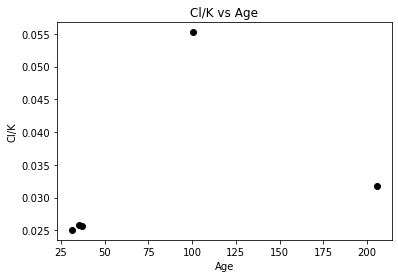

In [1183]:
# Crea 'Cl/K vs Age'
plt.scatter(results_data['Age'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Cl/K vs Age')
plt.xlabel('Age')
plt.ylabel('Cl/K')

Text(0, 0.5, 'Ca/K')

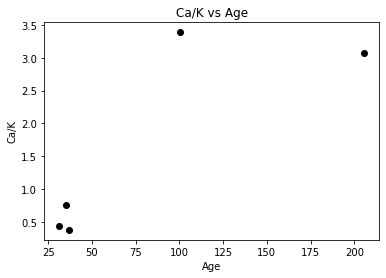

In [1184]:
# Crea 'Ca/K vs Age'
plt.scatter(results_data['Age'],results_data['Ca/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Age')
plt.xlabel('Age')
plt.ylabel('Ca/K')

Text(0, 0.5, 'Cl/K')

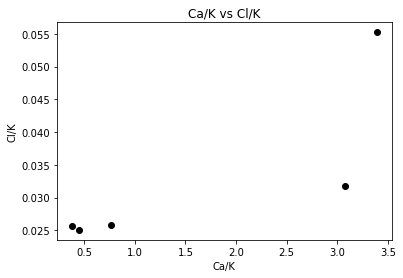

In [1185]:
# Crea 'Ca/K vs Cl/K'
plt.scatter(results_data['Ca/K'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Cl/K')
plt.xlabel('Ca/K')
plt.ylabel('Cl/K')

In [1186]:
# Crea Isocrona '36Ar/39Ar vs 39Ar/40Ar'
x = results_data['39/40'].dropna()
y = results_data['36/40'].dropna()

Text(0, 0.5, '36Ar/39Ar')

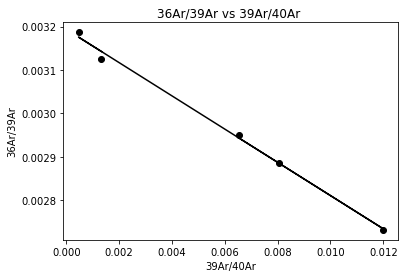

In [1187]:
plt.plot(x, y, 'o',color = 'black'),

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color = 'black')
plt.title('36Ar/39Ar vs 39Ar/40Ar ')
plt.xlabel('39Ar/40Ar')
plt.ylabel('36Ar/39Ar')


In [1188]:
x_intercept = -b/m
print ('x_intercept =',x_intercept )
print ('y_intercept =',b)
print ('slope =',m)

x_intercept = 0.0834350319727057
y_intercept = 0.0031932356750491407
slope = -0.038272121428487633


Crea Spectrum Age plot 

In [1189]:
# Crea la cumulata dei valori nella colonna '% 39Ar' del dataframe results data
cumulative = results_data['% 39Ar'].cumsum()

In [1190]:
cumulative_df = pd.DataFrame(cumulative)
cumulative_df

,% 39Ar
0,3.583693
1,9.178952
2,26.335051
3,58.001686
4,100.000000


In [1191]:
# Crea dataframe Age+2error
age_più_2error_df = pd.DataFrame(results_data['Age+2error'])
age_più_2error_df

,Age+2error
0,122.846828
1,245.068083
2,37.442397
3,32.776170
4,39.498907


In [1192]:
# Crea dataframe Age-2error
age_meno_2error_df = pd.DataFrame(results_data['Age-2error'])
age_meno_2error_df

,Age-2error
0,78.243822
1,165.730175
2,32.788527
3,30.113577
4,34.810204


In [1193]:
# Duplica i valori della cumulata
double_cumulative_df = pd.DataFrame(np.repeat(cumulative_df.values,2,axis=0))
double_cumulative_df.columns = cumulative_df.columns
double_cumulative_df

,% 39Ar
0,3.583693
1,3.583693
2,9.178952
3,9.178952
4,26.335051
5,26.335051
6,58.001686
7,58.001686
8,100.000000
9,100.000000


In [1194]:
# Rinomina il database double_cumulative (Cum%39)
double_cumulative_df= double_cumulative_df.rename(columns={"% 39Ar": "Cum%39"})
double_cumulative_df

,Cum%39
0,3.583693
1,3.583693
2,9.178952
3,9.178952
4,26.335051
5,26.335051
6,58.001686
7,58.001686
8,100.000000
9,100.000000


In [1195]:
# Cancella l'ultima riga di (Cum%39)
print(double_cumulative_df.index[-1])
double_cumulative_df=pd.DataFrame(double_cumulative_df.drop(index=double_cumulative_df.index[-1]))
double_cumulative_df

9


,Cum%39
0,3.583693
1,3.583693
2,9.178952
3,9.178952
4,26.335051
5,26.335051
6,58.001686
7,58.001686
8,100.000000


In [1196]:
# Aggiungi "O" alla prima riga di (Cum%39)
double_cumulative_df.loc[-1] = [0]  # adding a row
double_cumulative_df.index = double_cumulative_df.index + 1  # shifting index
double_cumulative_df= double_cumulative_df.sort_index()  # sorting by index
double_cumulative_df


,Cum%39
0,0.000000
1,3.583693
2,3.583693
3,9.178952
4,9.178952
5,26.335051
6,26.335051
7,58.001686
8,58.001686
9,100.000000


In [1197]:
# Duplica i valori di (Age+2error)
double_age_più_2error_df = pd.DataFrame(np.repeat(age_più_2error_df.values,2,axis=0))
double_age_più_2error_df.columns = age_più_2error_df.columns
double_age_più_2error_df

,Age+2error
0,122.846828
1,122.846828
2,245.068083
3,245.068083
4,37.442397
5,37.442397
6,32.776170
7,32.776170
8,39.498907
9,39.498907


In [1198]:
# Duplica i valori di (Age+2error)
double_age_meno_2error_df = pd.DataFrame(np.repeat(age_meno_2error_df.values,2,axis=0))
double_age_meno_2error_df.columns = age_meno_2error_df.columns
double_age_meno_2error_df

,Age-2error
0,78.243822
1,78.243822
2,165.730175
3,165.730175
4,32.788527
5,32.788527
6,30.113577
7,30.113577
8,34.810204
9,34.810204


In [1199]:
# Unione dei dataframe
double_cumulative_df['Age+2error'] = double_age_più_2error_df['Age+2error']
double_cumulative_df['Age-2error'] = double_age_meno_2error_df['Age-2error']
double_cumulative_df

,Cum%39,Age+2error,Age-2error
0,0.000000,122.846828,78.243822
1,3.583693,122.846828,78.243822
2,3.583693,245.068083,165.730175
3,9.178952,245.068083,165.730175
4,9.178952,37.442397,32.788527
5,26.335051,37.442397,32.788527
6,26.335051,32.776170,30.113577
7,58.001686,32.776170,30.113577
8,58.001686,39.498907,34.810204
9,100.000000,39.498907,34.810204


Text(0, 0.5, 'Apparent Age (Ma)')

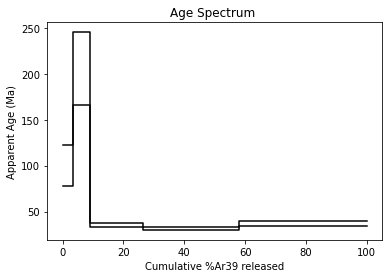

In [1204]:
# Spectrum Age
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age+2error'], label = 'Age+2error',color = 'black')
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age-2error'], label = 'Age-2error', color = 'black')
plt.title('Age Spectrum ')
plt.xlabel('Cumulative %Ar39 released')
plt.ylabel('Apparent Age (Ma)')
